In [1]:
import numpy as np
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

from utils import plot_2d_visualization, plot_digits_on_points, plot_multiple_2d_visualizations

np.random.seed(0)

# Experiment 1: Reproduce the results of the paper

In [2]:
# prep data

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0
y = mnist.target.astype(int)
X = np.array(X)
y = np.array(y)

# select subset of data
indices = np.random.choice(len(X), 6000, replace=False)
X_subset = X[indices]
y_subset = y[indices]

pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_subset)

/Users/jantiegges/.pyenv/versions/3.11.5/envs/a4-comp551/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


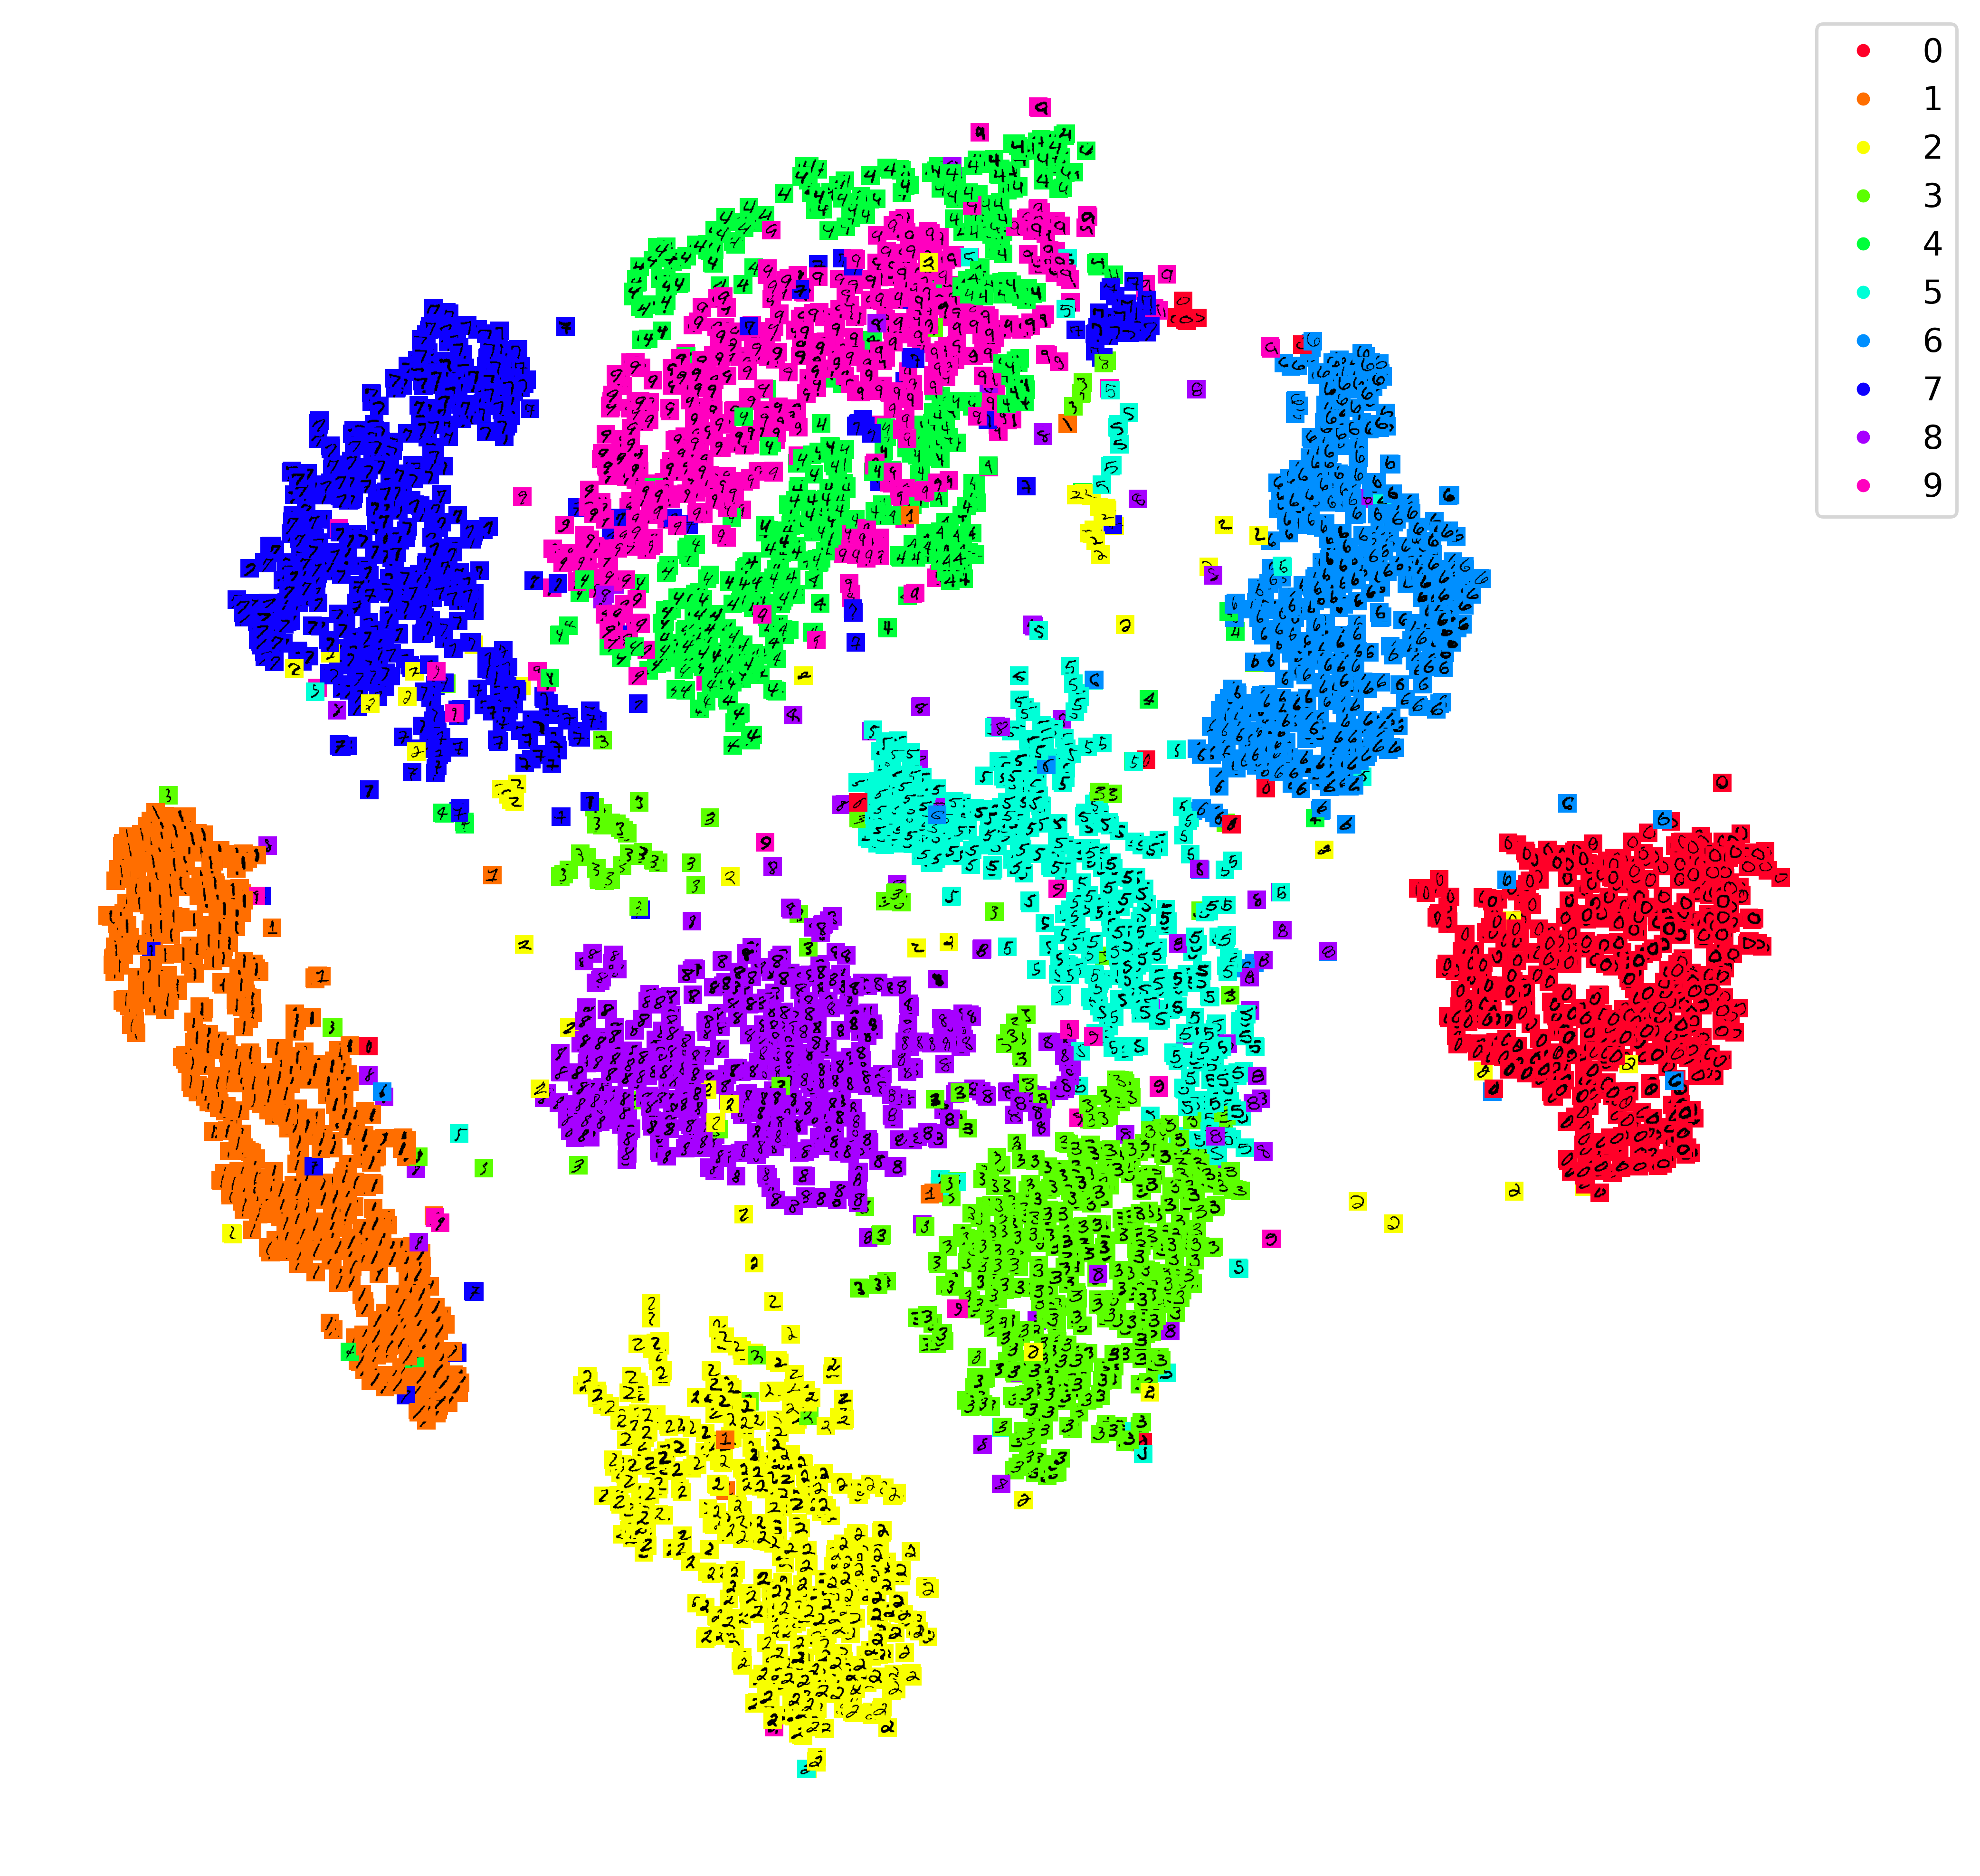

In [3]:
tsne = TSNE(n_components=2, perplexity=40)
X_tsne = tsne.fit_transform(X_pca)

#plot_2d_visualization(X_tsne, y_subset, figsize=(10, 10))
plot_digits_on_points(X_subset, X_tsne, y_subset, figsize=(10, 10), dpi=500)

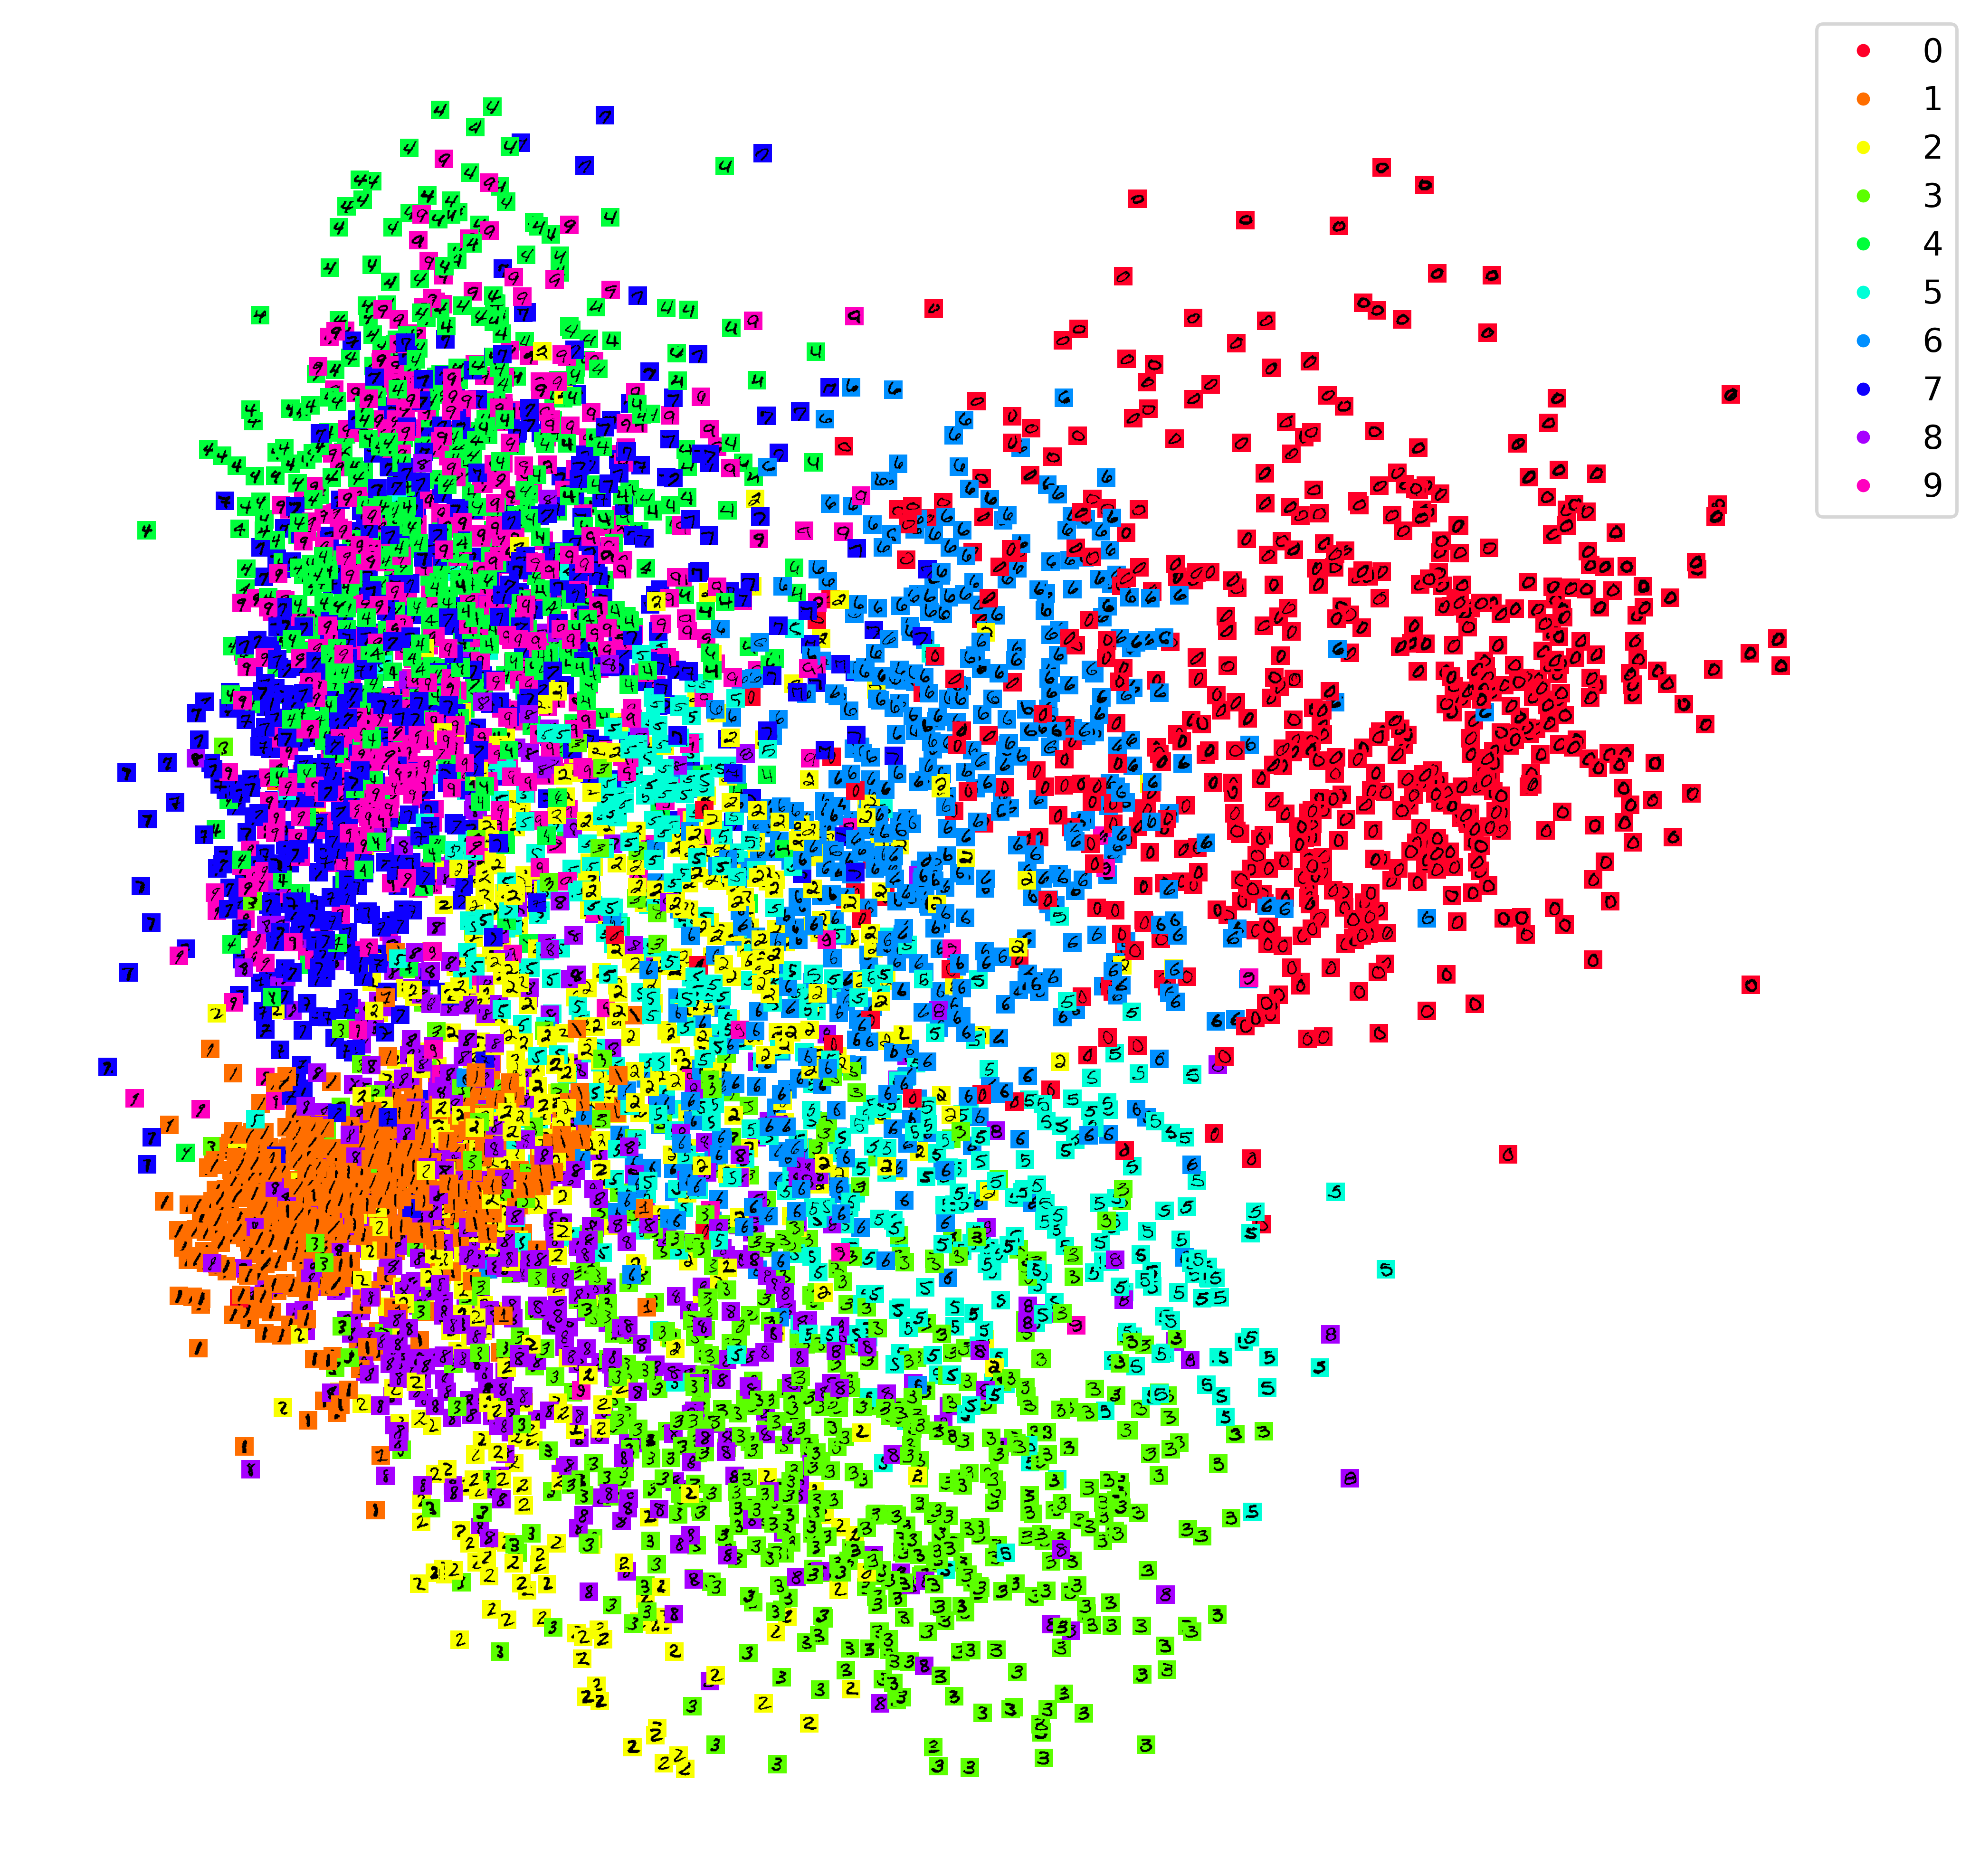

In [4]:
isomap = Isomap(n_components=2, n_neighbors=12)
X_isomap = isomap.fit_transform(X_pca)

#plot_2d_visualization(X_isomap, y_subset, figsize=(10, 10))
plot_digits_on_points(X_subset, X_isomap, y_subset, figsize=(10, 10), dpi=500)

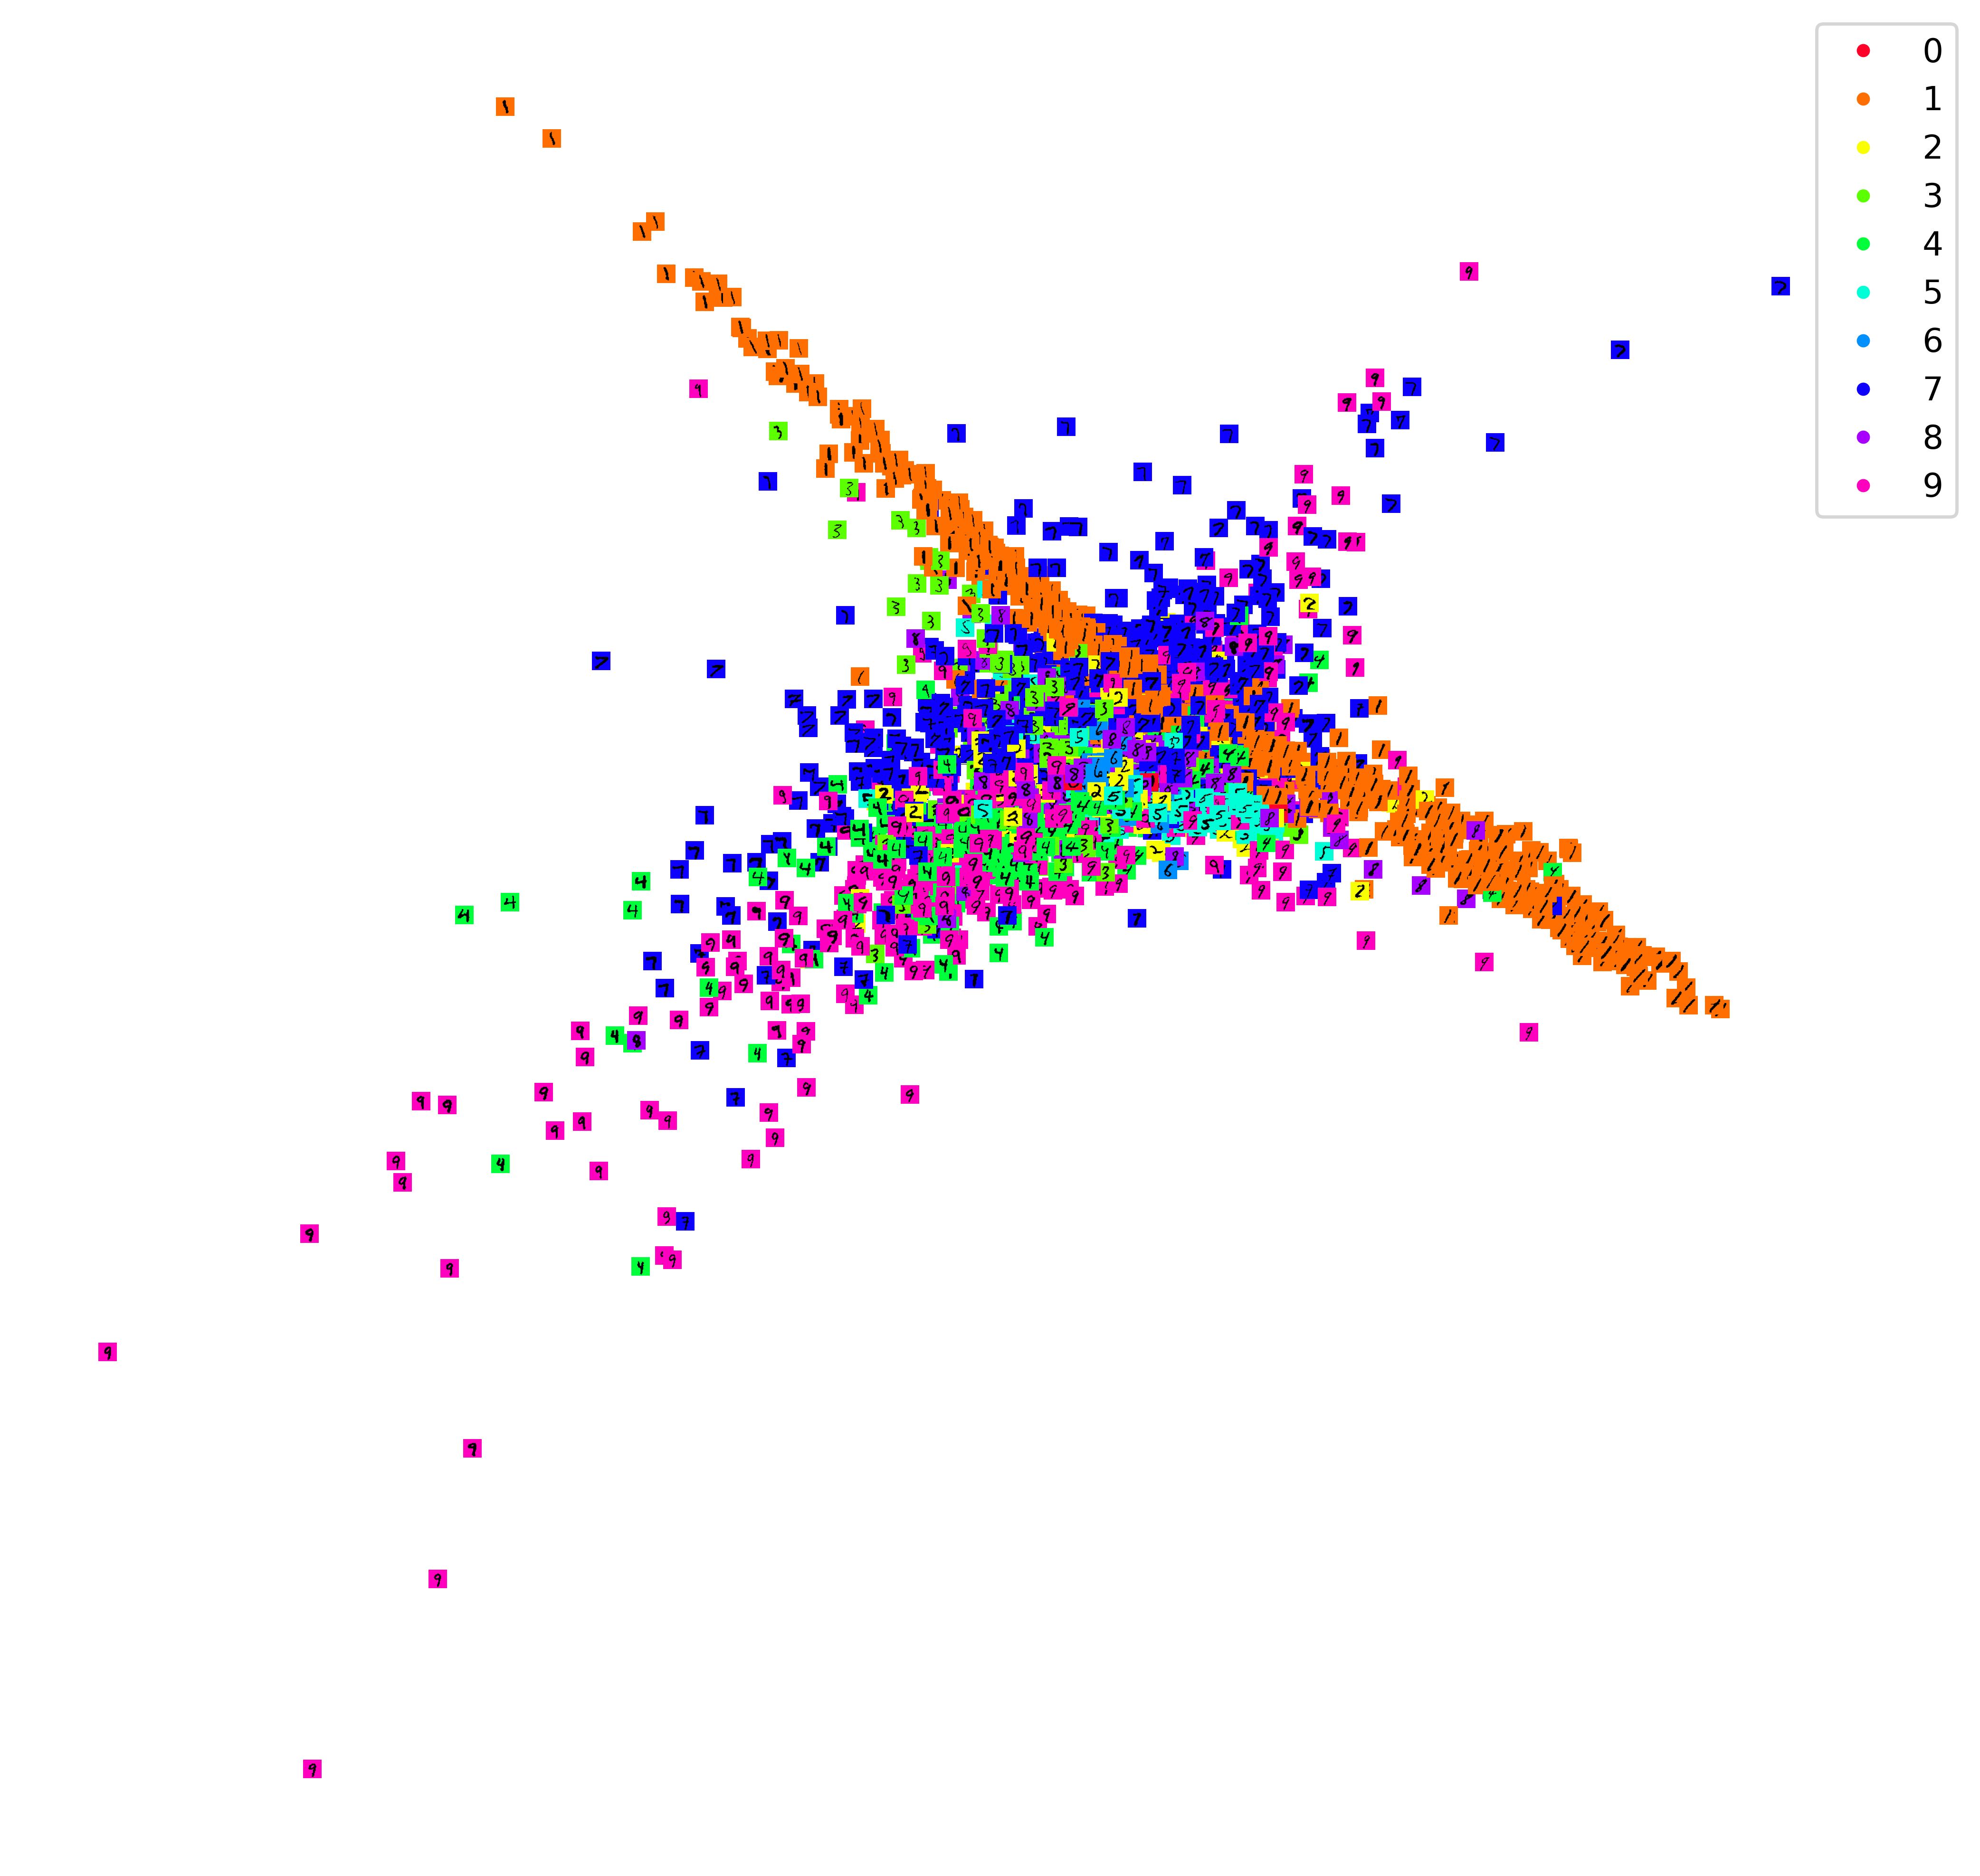

In [5]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=12)
X_lle = lle.fit_transform(X_pca)

#plot_2d_visualization(X_lle, y_subset, figsize=(10, 10))
plot_digits_on_points(X_subset, X_lle, y_subset, figsize=(10, 10), dpi=500)

# Ablation Study 1: Perplexity for t-SNE

In [6]:
# perplexities = [1, 2, 5, 10, 20, 40, 75, 100]

# X_tsne_list = []
# titles = []

# for perplexity in perplexities:
#     tsne_p = TSNE(n_components=2, perplexity=perplexity)
#     X_tsne_list.append(tsne_p.fit_transform(X_pca))
#     titles.append('Perplexity = {}'.format(perplexity))

# plot_size = [2, 4]
# plot_multiple_2d_visualizations(X_tsne_list, y_subset, titles, plot_size, legend=False)
    

# Ablation Study 2: Generalization Performance of t-SNE embeddings for different classifiers

## Logistic Regression

In [7]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

def train_and_evaluate(X_data, y_data, method='original', classifier='logistic', scale_data=False):
    # Scale the data if specified
    if scale_data:
        scaler = StandardScaler()
        X_data = scaler.fit_transform(X_data)
    
    # Select the appropriate classifier
    if classifier == 'logistic':
        clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=1000)
    elif classifier == 'knn-1':
        clf = KNeighborsClassifier(n_neighbors=1)
    elif classifier == 'knn-3':
        clf = KNeighborsClassifier(n_neighbors=3)
    elif classifier == 'knn-5':
        clf = KNeighborsClassifier(n_neighbors=5)
    elif classifier == 'random_forest':
        clf = RandomForestClassifier(random_state=0)
    else:
        raise ValueError(f"Invalid classifier: {classifier}")
    
    # Define the number of folds for cross-validation
    k_folds = 10
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=0)
    
    # Perform cross-validation
    accuracies = cross_val_score(clf, X_data, y_data, cv=kf, scoring='accuracy')
    
    # Return accuracy and generalization error
    return {'Method': method, 'Classifier': classifier, 'Average Accuracy': accuracies.mean(), 'Average Generalization Error': 1 - accuracies.mean()}

# Example usage and table creation:
results = []

# Iterate over methods, classifiers, and scaling options
for method, X_data in [('t-SNE', X_tsne), ('Isomap', X_isomap), ('LLE', X_lle), ('PCA', X_pca), ('Original', X_subset)]:
    for classifier in ['logistic', 'knn-1', 'knn-3', 'knn-5', 'random_forest']:
        result = train_and_evaluate(X_data, y_subset, method=method, classifier=classifier, scale_data=True)
        results.append(result)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the table
print(results_df)

/Users/jantiegges/.pyenv/versions/3.11.5/envs/a4-comp551/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jantiegges/.pyenv/versions/3.11.5/envs/a4-comp551/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h